In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('./new_temp_file/temperature_time')
df.drop(columns='Unnamed: 0', inplace=True)

def trend(time, slope = 0):
    return time * slope

for i in range(1,8):
    globals()['df_'+str(i)+'_temp'] = df[73462*(i-1):73462*i].reset_index().drop(columns=['index'], axis=0)

for i in range(1,8):
    mean = globals()['df_'+str(i)+'_temp']['TEMP'].mean()
    diff  = 283.733148 - mean
    globals()['df_'+str(i)+'_temp']['TEMP'] += diff

for i in range(8,12):
    globals()['df_'+str(i)+'_temp'] = globals()['df_'+str(i-5)+'_temp'].copy()

N = 6
dx = (600 - df_1_temp['TEMP'].mean()) / N # 전체 데이터에 대한 증가율 : 56.3785
dx_minute = dx / (len(df_1_temp)-1) # 분당 증가율

time = np.arange(73462)
slope = dx_minute * 2

for i in range(2,12):
    series = np.round(trend(time, slope = slope) + globals()['df_'+str(i)+'_temp']['TEMP'] + dx*(i-2), 3)
    globals()['df_'+str(i)+'_temp']['TEMP'] = series

df_temp_all = pd.concat([df_1_temp, df_2_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_3_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_4_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_5_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_6_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_7_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_8_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_9_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_10_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_11_temp], axis = 0)
df_temp_all = df_temp_all.reset_index().drop(columns=['index','TIME'])
tmp = np.arange(808082)
TIME = pd.DataFrame({'TIME' : tmp})
df_temp_all = pd.concat([df_temp_all, TIME], axis = 1)

for i in range(1,12):
    data = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'SKEW' : [], 'KURT' : [], 'MEDIAN':[], '25%' : [], '75%' : [], 'Group' : []}

    for j in range(0,73462,15):
        temp = globals()['df_'+str(i)+'_temp']['TEMP'][j:j+20]
        MEAN = np.round(np.mean(temp), 3)
        MIN = np.min(temp)
        MAX = np.max(temp)
        STD = np.std(temp)
        median = temp.median()
        skew = temp.skew()
        kurt = temp.kurt()
        a, b = np.percentile(temp, q = [25,75])

        data['Group'].append(i)
        data['MEAN_TEMP'].append(MEAN)
        data['MIN'].append(MIN)
        data['MAX'].append(MAX)
        data['STD'].append(STD)
        data['SKEW'].append(skew)
        data['KURT'].append(kurt)
        data['MEDIAN'].append(np.round(median,3))
        data['25%'].append(np.round(a,3))
        data['75%'].append(np.round(b,3))

    globals()['group_'+str(i)] = pd.DataFrame(data)




tmp = pd.concat([group_1, group_2], axis = 0)
tmp = pd.concat([tmp, group_3], axis = 0)
tmp = pd.concat([tmp, group_4], axis = 0)
tmp = pd.concat([tmp, group_5], axis = 0)
tmp = pd.concat([tmp, group_6], axis = 0)
tmp = pd.concat([tmp, group_7], axis = 0)
tmp = pd.concat([tmp, group_8], axis = 0)
tmp = pd.concat([tmp, group_9], axis = 0)
tmp = pd.concat([tmp, group_10], axis = 0)
tmp = pd.concat([tmp, group_11], axis = 0)
TIME = pd.DataFrame({'TIME' : np.arange(len(tmp))})
tmp = tmp.reset_index()
tmp = pd.concat([tmp, TIME], axis = 1)
tmp.drop(columns = ['index'], inplace = True)
df_9_cols = tmp
df_9_cols = df_9_cols.dropna(axis = 0).reset_index().drop(columns=['index'])
df_9_cols


,MEAN_TEMP,STD,MIN,MAX,SKEW,KURT,MEDIAN,25%,75%,Group,TIME
0,285.886,0.703473,284.483,287.082,-0.295420,-0.875405,285.893,285.274,286.394,1,0
1,283.442,1.447050,281.401,286.373,0.750285,-0.205477,283.217,282.480,283.947,1,1
2,283.295,0.440360,282.306,284.014,-0.567776,-0.220987,283.327,283.082,283.642,1,2
3,283.934,0.786485,282.952,285.439,0.761031,-0.745803,283.649,283.322,284.548,1,3
4,283.616,0.676819,282.463,285.036,0.524393,0.099465,283.514,283.180,283.875,1,4
...,...,...,...,...,...,...,...,...,...,...,...
53873,859.469,0.069259,859.259,859.599,-1.694207,4.534614,859.478,859.464,859.493,11,53873
53874,859.483,0.195625,859.055,859.769,-0.407907,-0.315194,859.477,859.378,859.658,11,53874
53875,858.899,0.373143,858.337,859.465,-0.029760,-1.518960,858.917,858.602,859.247,11,53875
53876,859.058,0.262727,858.522,859.522,0.008027,-0.418698,858.999,858.941,859.286,11,53876


In [2]:
def THRESHOLD(data):
    if data>=797.314:
        return 11
    elif data>=740.9375:
        return 10
    elif data>=684.5565:
        return 9
    elif data>=628.1795:
        return 8
    elif data>=571.7965:
        return 7
    elif data>=515.4215:
        return 6
    elif data>=459.045:
        return 5
    elif data>=402.6645:
        return 4
    elif data>=346.28:
        return 3
    elif data>=289/9025:
        return 2
    else:
        return 1

In [30]:
Window_size = [10,20,30,60]
stride = [0.5, 0.333333333]

for w in Window_size:
    for s in stride:
        STRIDE = int(w * s)
        print(w, STRIDE)
        for i in range(1,12):
            data = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'SKEW' : [], 'KURT' : [], 'MEDIAN':[], '25%' : [], '75%' : [], 'Group' : []}

            for j in range(0,73462,STRIDE):
                temp = globals()['df_'+str(i)+'_temp']['TEMP'][j:j+w]
                MEAN = np.round(np.mean(temp), 3)
                MIN = np.min(temp)
                MAX = np.max(temp)
                STD = np.std(temp)
                median = temp.median()
                skew = temp.skew()
                kurt = temp.kurt()
                a, b = np.percentile(temp, q = [25,75])

                data['Group'].append(i)
                data['MEAN_TEMP'].append(MEAN)
                data['MIN'].append(MIN)
                data['MAX'].append(MAX)
                data['STD'].append(STD)
                data['SKEW'].append(skew)
                data['KURT'].append(kurt)
                data['MEDIAN'].append(np.round(median,3))
                data['25%'].append(np.round(a,3))
                data['75%'].append(np.round(b,3))

            globals()['group_'+str(i)] = pd.DataFrame(data)




        tmp = pd.concat([group_1, group_2], axis = 0)
        tmp = pd.concat([tmp, group_3], axis = 0)
        tmp = pd.concat([tmp, group_4], axis = 0)
        tmp = pd.concat([tmp, group_5], axis = 0)
        tmp = pd.concat([tmp, group_6], axis = 0)
        tmp = pd.concat([tmp, group_7], axis = 0)
        tmp = pd.concat([tmp, group_8], axis = 0)
        tmp = pd.concat([tmp, group_9], axis = 0)
        tmp = pd.concat([tmp, group_10], axis = 0)
        tmp = pd.concat([tmp, group_11], axis = 0)
        TIME = pd.DataFrame({'TIME' : np.arange(len(tmp))})
        tmp = tmp.reset_index()
        tmp = pd.concat([tmp, TIME], axis = 1)
        tmp.drop(columns = ['index'], inplace = True)
        df_9_cols = tmp
        df_9_cols = df_9_cols.dropna(axis = 0).reset_index().drop(columns=['index'])
        df_9_cols

        from sklearn.model_selection import train_test_split
        from lightgbm import LGBMClassifier

        X = df_9_cols.iloc[:, :9].values
        y = df_9_cols['Group'].values



        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 96)
        print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

        lgbm = LGBMClassifier(n_estimators = 100)

        lgbm.fit(X_train, y_train,
                eval_metric = 'multi_logloss',
                eval_set = [(X_test, y_test)])
        lgbm_predict = lgbm.predict(X_test)
        print("LGBM ", accuracy_score(y_test, lgbm_predict))

        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors = 11)
        knn.fit(X_train, y_train)
        knn_pred = knn.predict(X_test)
        print("KN", accuracy_score(y_test, knn_pred))

        from sklearn.tree import DecisionTreeClassifier
        dtc = DecisionTreeClassifier(random_state = 42)

        dtc.fit(X_train, y_train)
        dtc_pred = dtc.predict(X_test)
        print("DTC", accuracy_score(y_test, dtc_pred))

        from sklearn.ensemble import RandomForestClassifier

        clf = RandomForestClassifier(n_estimators=100, max_depth = 50, random_state = 96)
        clf.fit(X_train, y_train)

        clf_predict = clf.predict(X_test)
        print("RFC", accuracy_score(clf_predict, y_test))

        X = df_9_cols['MEAN_TEMP'].values
        Y = df_9_cols['Group'].values

        predict = list(map(THRESHOLD, X))
        print(accuracy_score(predict, Y))

10 5
(129289, 9) (32323, 9) (129289,) (32323,)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 129289, number of used features: 9
[LightGBM] [Info] Start training from score -2.395817
[LightGBM] [Info] Start training from score -2.400412
[LightGBM] [Info] Start training from score -2.395732
[LightGBM] [Info] Start training from score -2.393188
[LightGBM] [Info] Start training from score -2.397686
[LightGBM] [Info] Start training from score -2.401692
[LightGBM] [Info] Start training from score -2.395987
[LightGBM] [Info] Start training from score -2.394374
[LightGBM] [Info] Start training from score -2.400242
[LightGBM] [Info] Start training from score -2.402205
[LightGBM] [Info] Start training from score -2.399560
LGBM  0.7782074683661789
KN 0.7661726943662408
DTC 0.731708071651765
R

In [6]:
for i in range(1,12):
    data = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'SKEW' : [], 'KURT' : [], 'MEDIAN':[], '25%' : [], '75%' : [], 'label' : []}

    for j in range(0,73462,20):
        temp = globals()['df_'+str(i)+'_temp']['TEMP'][j:j+60]
        MEAN = np.round(np.mean(temp), 3)
        MIN = np.min(temp)
        MAX = np.max(temp)
        STD = np.std(temp)
        median = temp.median()
        skew = temp.skew()
        kurt = temp.kurt()
        a, b = np.percentile(temp, q = [25,75])

        data['label'].append(i)
        data['MEAN_TEMP'].append(MEAN)
        data['MIN'].append(MIN)
        data['MAX'].append(MAX)
        data['STD'].append(STD)
        data['SKEW'].append(skew)
        data['KURT'].append(kurt)
        data['MEDIAN'].append(np.round(median,3))
        data['25%'].append(np.round(a,3))
        data['75%'].append(np.round(b,3))

    globals()['group_'+str(i)] = pd.DataFrame(data)



tmp = pd.concat([group_1, group_2], axis = 0)
tmp = pd.concat([tmp, group_3], axis = 0)
tmp = pd.concat([tmp, group_4], axis = 0)
tmp = pd.concat([tmp, group_5], axis = 0)
tmp = pd.concat([tmp, group_6], axis = 0)
tmp = pd.concat([tmp, group_7], axis = 0)
tmp = pd.concat([tmp, group_8], axis = 0)
tmp = pd.concat([tmp, group_9], axis = 0)
tmp = pd.concat([tmp, group_10], axis = 0)
tmp = pd.concat([tmp, group_11], axis = 0)
TIME = pd.DataFrame({'TIME' : np.arange(len(tmp))})
tmp = tmp.reset_index()
tmp = pd.concat([tmp, TIME], axis = 1)
tmp.drop(columns = ['index'], inplace = True)
df_9_cols = tmp
df_9_cols = df_9_cols.dropna(axis = 0).reset_index().drop(columns=['index'])
df_9_cols

,MEAN_TEMP,STD,MIN,MAX,SKEW,KURT,MEDIAN,25%,75%,label,TIME
0,284.174,1.466831,281.401,287.082,0.273302,-0.938145,283.754,283.221,285.415,1,0
1,283.417,0.832332,281.401,285.439,0.167324,0.698825,283.408,283.046,283.803,1,1
2,284.153,1.006652,282.463,286.597,0.787491,-0.240354,283.809,283.442,284.841,1,2
3,284.210,1.050080,282.354,286.597,0.380891,-0.499881,283.951,283.455,284.948,1,3
4,284.175,1.081684,282.258,286.597,0.305962,-0.501457,283.938,283.430,284.929,1,4
...,...,...,...,...,...,...,...,...,...,...,...
40398,859.455,0.489273,858.268,860.717,0.460233,1.379858,859.475,859.230,859.580,11,40408
40399,859.425,0.547108,858.268,860.717,0.029020,0.792776,859.469,859.252,859.604,11,40409
40400,859.214,0.371047,858.337,859.769,-0.749589,-0.249938,859.315,858.989,859.472,11,40410
40401,859.047,0.356008,858.337,859.755,-0.232467,-0.636235,859.052,858.827,859.327,11,40411


In [17]:
def THRESHOLD(data):
    if data>=797.314:
        return 11
    elif data>=740.9375:
        return 10
    elif data>=684.5565:
        return 9
    elif data>=628.1795:
        return 8
    elif data>=571.7965:
        return 7
    elif data>=515.4215:
        return 6
    elif data>=459.045:
        return 5
    elif data>=402.6645:
        return 4
    elif data>=346.28:
        return 3
    elif data>=289/9025:
        return 2
    else:
        return 1

In [21]:
X = df_9_cols['MEAN_TEMP'].values
Y = df_9_cols['label'].values

predict = list(map(THRESHOLD, X))
print(accuracy_score(predict, Y))

0.5289953716308194


In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

X = df_9_cols.iloc[:, :9].values
y = df_9_cols['Group'].values



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lgbm = LGBMClassifier(n_estimators = 100)

lgbm.fit(X_train, y_train,
         eval_metric = 'multi_logloss',
         eval_set = [(X_test, y_test)])
lgbm_predict = lgbm.predict(X_test)
print("LGBM ", accuracy_score(y_test, lgbm_predict))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KN", accuracy_score(y_test, knn_pred))

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)

dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print("DTC", accuracy_score(y_test, dtc_pred))

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth = 50, random_state = 96)
clf.fit(X_train, y_train)

clf_predict = clf.predict(X_test)
print("RFC", accuracy_score(clf_predict, y_test))

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def ML(X_train, X_test, y_train, y_test):
        KN = []
        LGBM = []
        DTC = []
        RFC = []

        knn = KNeighborsClassifier(n_neighbors = 10)
        knn.fit(X_train, y_train)
        knn_pred = knn.predict(X_test)
        kn_ac = accuracy_score(y_test, knn_pred)

        lgbm = LGBMClassifier(n_estimators = 100)
        lgbm.fit(X_train, y_train,
                eval_metric = 'multi_logloss',
                eval_set = [(X_test, y_test)])
        lgbm_predict = lgbm.predict(X_test)
        lgbm_ac = accuracy_score(y_test, lgbm_predict)

        dtc = DecisionTreeClassifier()
        dtc.fit(X_train, y_train)
        dtc_pred = dtc.predict(X_test)
        dtc_ac = accuracy_score(y_test, dtc_pred)

        clf = RandomForestClassifier(n_estimators=100, max_depth = 50)
        clf.fit(X_train, y_train)
        clf_predict = clf.predict(X_test)
        clf_ac = accuracy_score(y_test, clf_predict)


        return kn_ac, lgbm_ac, dtc_ac, clf_ac
        KN.append(kn_ac)
    




In [12]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

X = df_9_cols.iloc[:, :9].values
y = df_9_cols['label'].values


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(32322, 9) (8081, 9) (32322,) (8081,)


In [28]:
KN = []
LGBM = []
DTC = []
RFC = []

for epoch in range(10):
    print(f"{epoch+1} Epochs...")
    print()
    
    kn_ac, lgbm_ac, dtc_ac, clf_ac = ML(X_train, X_test, y_train, y_test)

    KN.append(kn_ac)
    LGBM.append(lgbm_ac)
    DTC.append(dtc_ac)
    RFC.append(clf_ac)

print("KN : ", KN)
print("LGBM : ", LGBM)
print("DTC : ", DTC)
print("RFC : ", RFC)


1 Epochs...

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 32322, number of used features: 9
[LightGBM] [Info] Start training from score -2.402796
[LightGBM] [Info] Start training from score -2.379472
[LightGBM] [Info] Start training from score -2.394621
[LightGBM] [Info] Start training from score -2.402454
[LightGBM] [Info] Start training from score -2.405878
[LightGBM] [Info] Start training from score -2.383154
[LightGBM] [Info] Start training from score -2.377469
[LightGBM] [Info] Start training from score -2.415877
[LightGBM] [Info] Start training from score -2.410003
[LightGBM] [Info] Start training from score -2.413800
[LightGBM] [Info] Start training from score -2.392249
2 Epochs...

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.0003

In [29]:
np.mean(KN), np.mean(LGBM), np.mean(DTC ), np.mean(RFC )

(0.8111619849028585,
 0.8209380027224353,
 0.8086499195644103,
 0.8543497091944067)

In [30]:
np.mean(KN) - np.max(KN), np.mean(KN) - np.min(KN)

(0.0, 0.0)

In [31]:
np.mean(LGBM) - np.max(LGBM), np.mean(LGBM) - np.min(LGBM)

(0.0, 0.0)

In [32]:
np.mean(DTC) - np.max(DTC), np.mean(DTC) - np.min(DTC)

(-0.003007053582477437, 0.002809058284865773)

In [33]:
np.mean(RFC) - np.max(RFC), np.mean(RFC) - np.min(RFC)

(-0.0017324588541022257, 0.001979952976116861)

In [35]:
x_axis = [10,20,30,60,120,240]
y_axis = [81, 83, 84, 85, 80, 77]

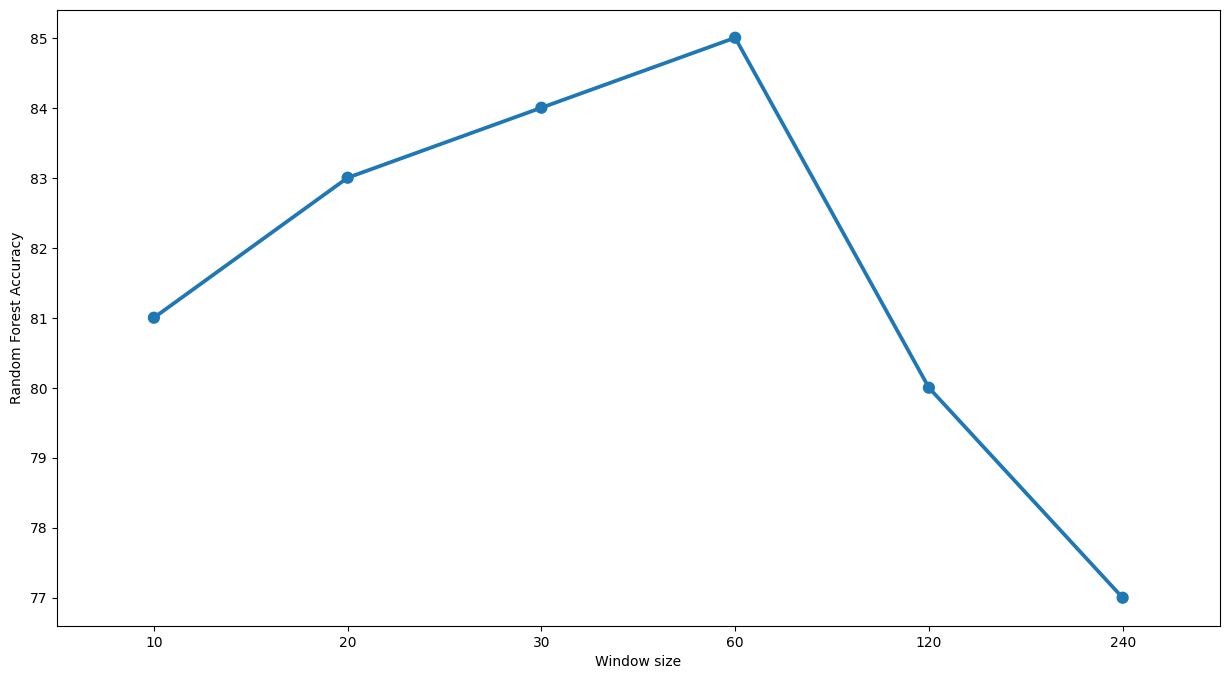

In [41]:
plt.figure(figsize = (15,8))
g = sns.pointplot(x = x_axis, y = y_axis)
plt.xlabel('Window size')
plt.ylabel('Random Forest Accuracy')
g.set_xticklabels(['10','20','30','60','120','240'])
plt.show()